In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

[0.04213571 0.03466448]


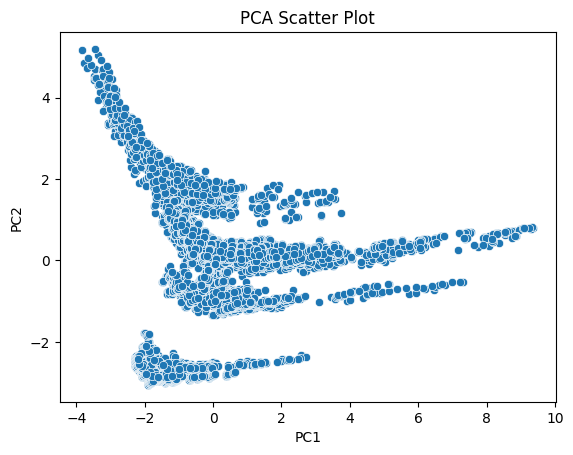

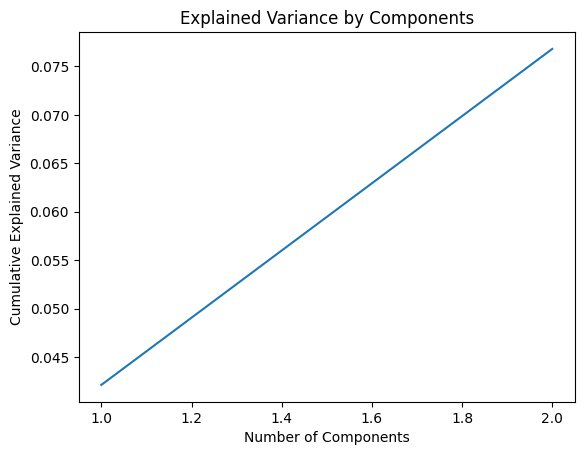

In [6]:
df = pd.read_csv('../udataset/acs/EMPLOYMENT STATUS.csv')

df = df.dropna()

# Flatten headers and subheaders
df.columns = ['_'.join(col) for col in df.columns]

# Convert categorical variables to numerical
df = pd.get_dummies(df)

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)

# Convert to DataFrame
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Print explained variance ratio
print(pca.explained_variance_ratio_)

sns.scatterplot(x='PC1', y='PC2', data=principalDf)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.show()

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.show()
